# Simple Harmonic Oscillator

## Theoretical Foundation

The **simple harmonic oscillator** (SHO) is one of the most fundamental systems in physics, serving as a cornerstone model for understanding oscillatory behavior across mechanics, electromagnetism, quantum mechanics, and beyond.

### Equation of Motion

Consider a mass $m$ attached to a spring with spring constant $k$. When displaced from equilibrium by a distance $x$, the restoring force follows Hooke's Law:

$$F = -kx$$

Applying Newton's second law ($F = ma$), we obtain the equation of motion:

$$m\frac{d^2x}{dt^2} = -kx$$

This can be rewritten in standard form:

$$\frac{d^2x}{dt^2} + \omega_0^2 x = 0$$

where $\omega_0 = \sqrt{k/m}$ is the **natural angular frequency** of oscillation.

### General Solution

The general solution to this second-order linear differential equation is:

$$x(t) = A\cos(\omega_0 t + \phi)$$

where:
- $A$ is the amplitude (maximum displacement)
- $\phi$ is the phase constant (determined by initial conditions)

Equivalently, using initial conditions $x(0) = x_0$ and $v(0) = v_0$:

$$x(t) = x_0\cos(\omega_0 t) + \frac{v_0}{\omega_0}\sin(\omega_0 t)$$

### Velocity and Acceleration

The velocity is the time derivative of position:

$$v(t) = \frac{dx}{dt} = -A\omega_0\sin(\omega_0 t + \phi)$$

The acceleration is:

$$a(t) = \frac{d^2x}{dt^2} = -A\omega_0^2\cos(\omega_0 t + \phi) = -\omega_0^2 x(t)$$

### Energy Conservation

The total mechanical energy of the SHO is conserved:

$$E = \frac{1}{2}mv^2 + \frac{1}{2}kx^2 = \frac{1}{2}kA^2 = \text{constant}$$

where:
- Kinetic energy: $T = \frac{1}{2}mv^2$
- Potential energy: $U = \frac{1}{2}kx^2$

### Period and Frequency

The **period** $T$ (time for one complete oscillation) is:

$$T = \frac{2\pi}{\omega_0} = 2\pi\sqrt{\frac{m}{k}}$$

The **frequency** $f$ (oscillations per unit time) is:

$$f = \frac{1}{T} = \frac{\omega_0}{2\pi} = \frac{1}{2\pi}\sqrt{\frac{k}{m}}$$

## Numerical Implementation

We will now implement a numerical simulation of the simple harmonic oscillator, comparing the analytical solution with numerical integration using the `scipy.integrate.odeint` solver.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Physical parameters
m = 1.0      # mass (kg)
k = 4.0      # spring constant (N/m)
omega_0 = np.sqrt(k / m)  # natural angular frequency (rad/s)

# Initial conditions
x_0 = 1.0    # initial displacement (m)
v_0 = 0.0    # initial velocity (m/s)

# Time array
t = np.linspace(0, 10, 1000)

# Calculate period and frequency
T = 2 * np.pi / omega_0
f = 1 / T

print(f"Natural angular frequency: ω₀ = {omega_0:.4f} rad/s")
print(f"Period: T = {T:.4f} s")
print(f"Frequency: f = {f:.4f} Hz")

Natural angular frequency: ω₀ = 2.0000 rad/s
Period: T = 3.1416 s
Frequency: f = 0.3183 Hz


### Analytical Solution

In [2]:
# Analytical solution
x_analytical = x_0 * np.cos(omega_0 * t) + (v_0 / omega_0) * np.sin(omega_0 * t)
v_analytical = -x_0 * omega_0 * np.sin(omega_0 * t) + v_0 * np.cos(omega_0 * t)
a_analytical = -omega_0**2 * x_analytical

### Numerical Solution using ODE Integration

We convert the second-order ODE to a system of first-order ODEs:

$$\frac{dx}{dt} = v$$
$$\frac{dv}{dt} = -\omega_0^2 x$$

In [3]:
def sho_derivatives(state, t, omega_0):
    """
    Compute derivatives for the simple harmonic oscillator.
    
    Parameters:
        state: [x, v] - current position and velocity
        t: time (unused for autonomous system)
        omega_0: natural angular frequency
    
    Returns:
        [dx/dt, dv/dt]
    """
    x, v = state
    dxdt = v
    dvdt = -omega_0**2 * x
    return [dxdt, dvdt]

# Initial state vector
state_0 = [x_0, v_0]

# Numerical integration
solution = odeint(sho_derivatives, state_0, t, args=(omega_0,))
x_numerical = solution[:, 0]
v_numerical = solution[:, 1]

### Energy Calculation

In [4]:
# Calculate energies
KE = 0.5 * m * v_analytical**2      # Kinetic energy
PE = 0.5 * k * x_analytical**2       # Potential energy
E_total = KE + PE                    # Total energy

# Theoretical total energy
E_theoretical = 0.5 * k * x_0**2 + 0.5 * m * v_0**2
print(f"Theoretical total energy: E = {E_theoretical:.4f} J")
print(f"Energy conservation check - Max deviation: {np.max(np.abs(E_total - E_theoretical)):.2e} J")

Theoretical total energy: E = 2.0000 J
Energy conservation check - Max deviation: 4.44e-16 J


## Visualization

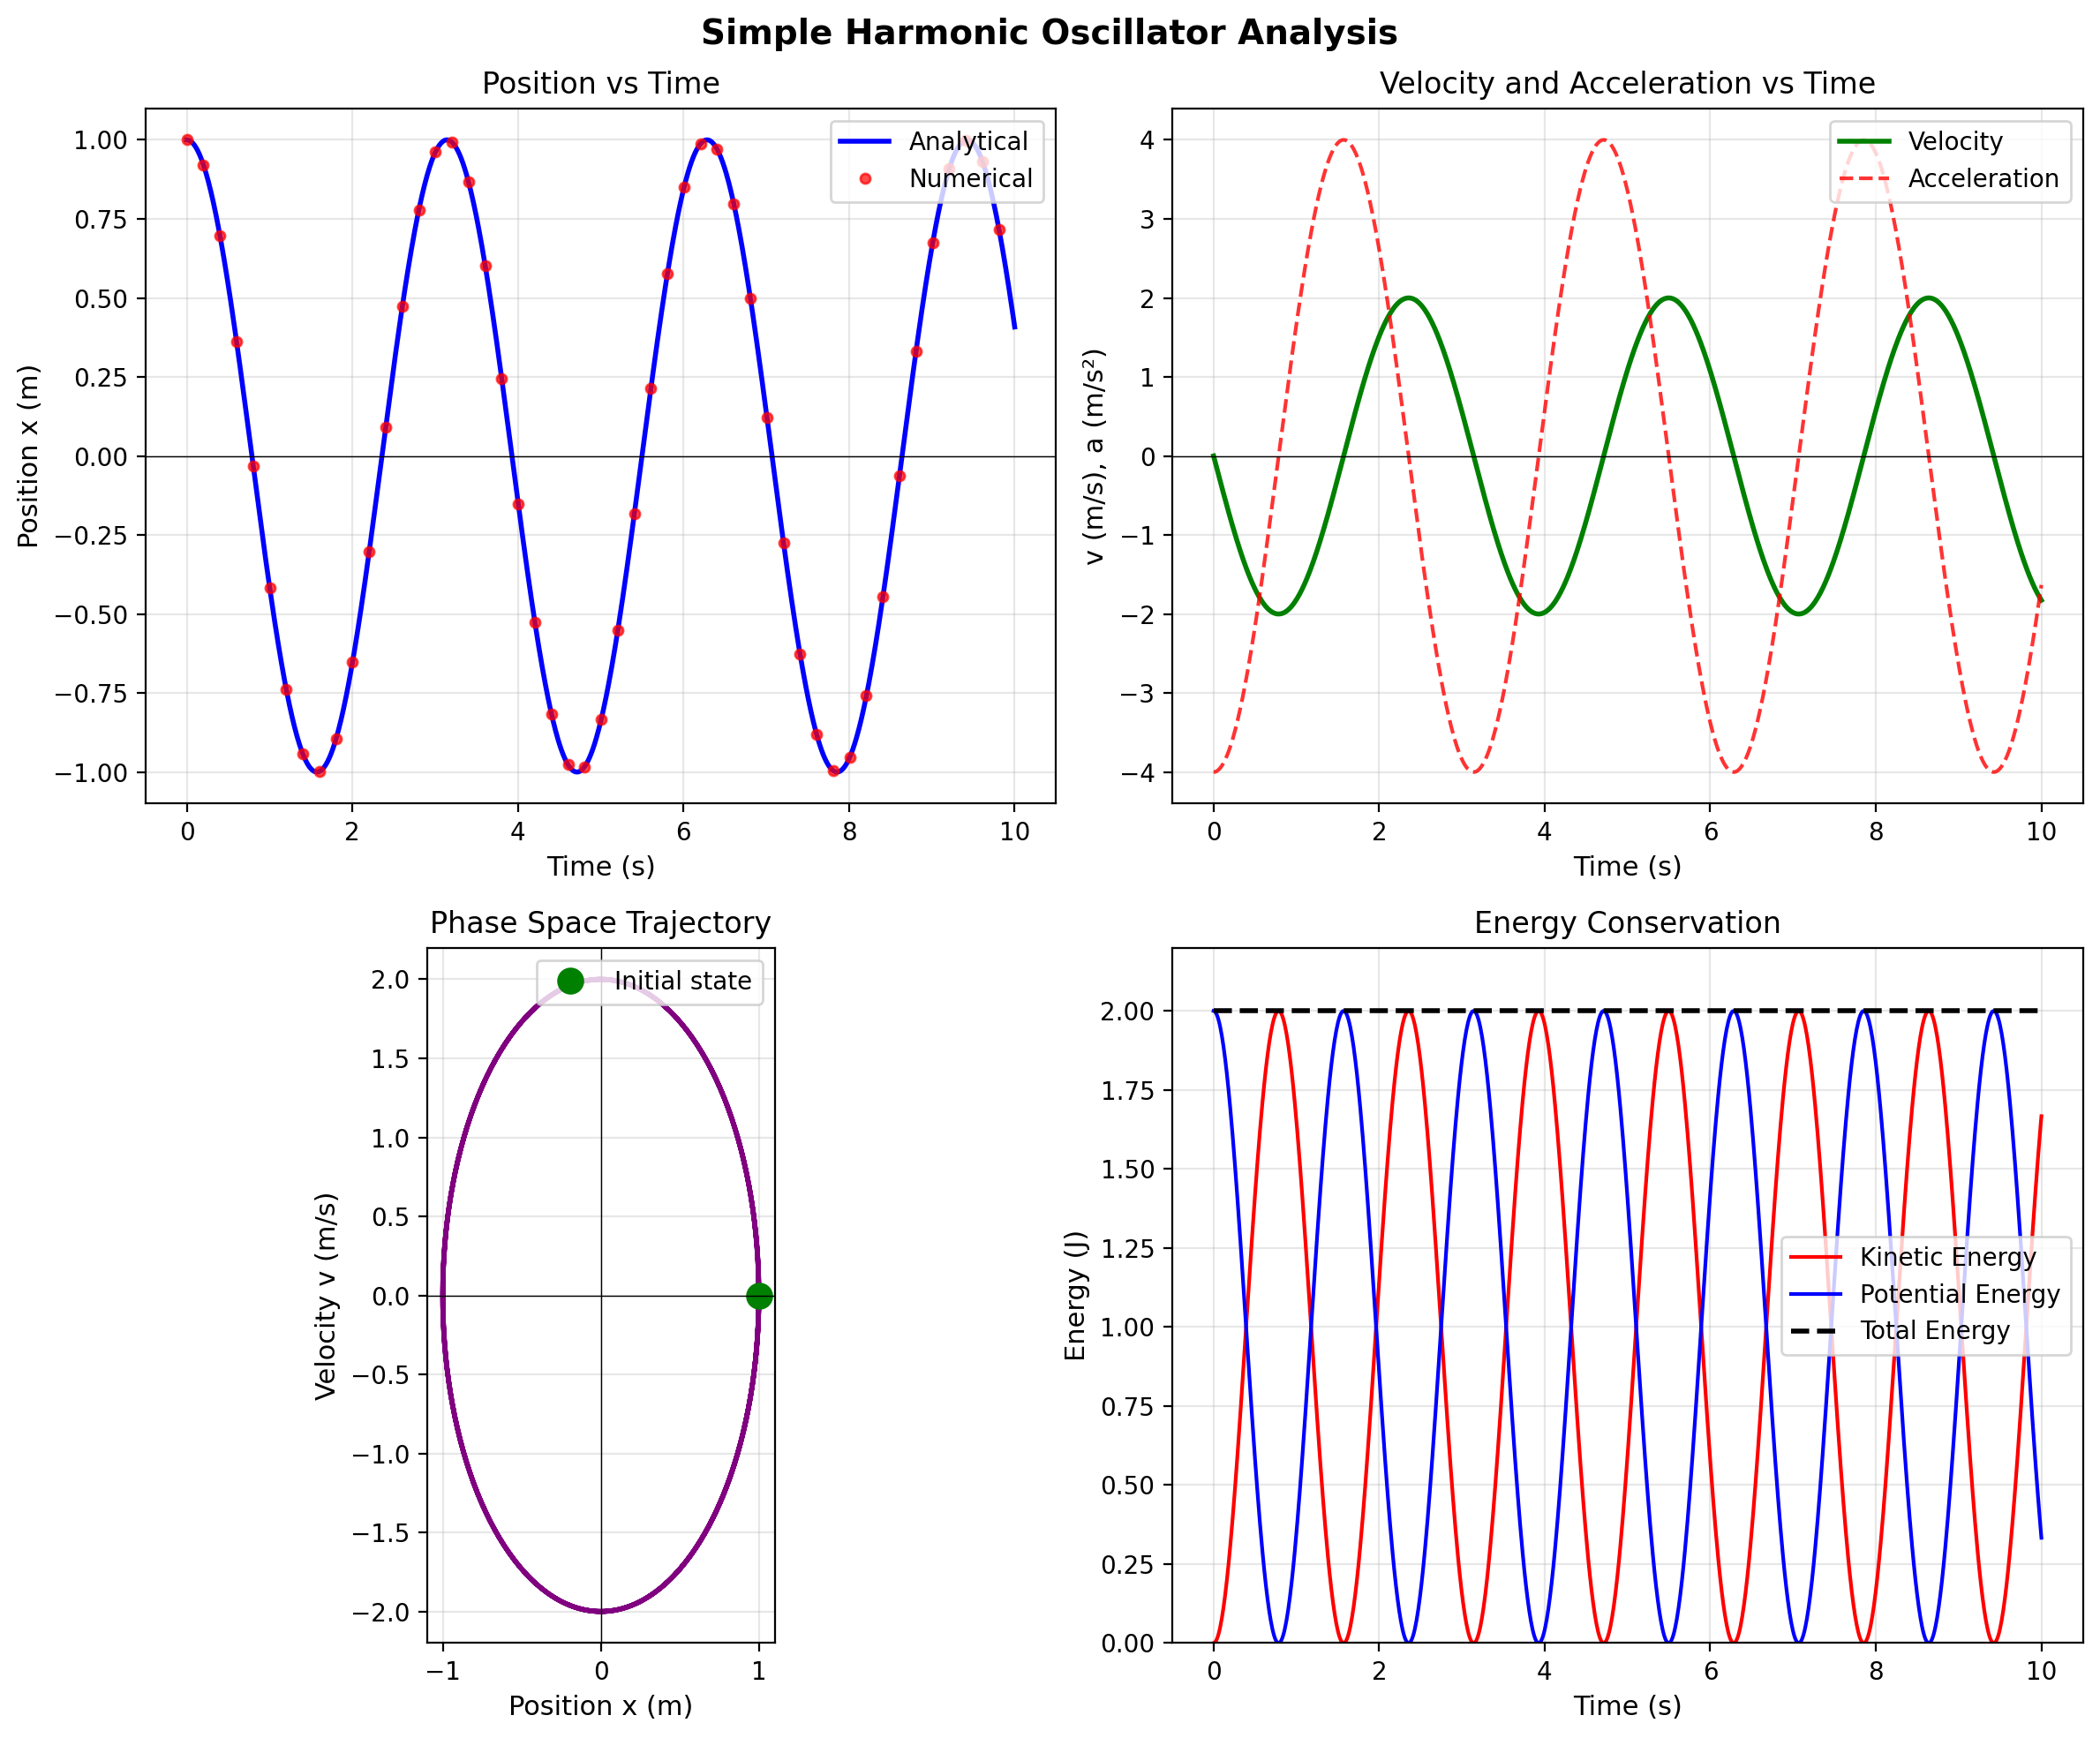


Plot saved to 'plot.png'


In [5]:
# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Simple Harmonic Oscillator Analysis', fontsize=14, fontweight='bold')

# Plot 1: Position vs Time
ax1 = axes[0, 0]
ax1.plot(t, x_analytical, 'b-', linewidth=2, label='Analytical')
ax1.plot(t[::20], x_numerical[::20], 'ro', markersize=4, label='Numerical', alpha=0.7)
ax1.set_xlabel('Time (s)', fontsize=11)
ax1.set_ylabel('Position x (m)', fontsize=11)
ax1.set_title('Position vs Time', fontsize=12)
ax1.legend(loc='upper right')
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='k', linewidth=0.5)

# Plot 2: Velocity vs Time
ax2 = axes[0, 1]
ax2.plot(t, v_analytical, 'g-', linewidth=2, label='Velocity')
ax2.plot(t, a_analytical, 'r--', linewidth=1.5, label='Acceleration', alpha=0.8)
ax2.set_xlabel('Time (s)', fontsize=11)
ax2.set_ylabel('v (m/s), a (m/s²)', fontsize=11)
ax2.set_title('Velocity and Acceleration vs Time', fontsize=12)
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3)
ax2.axhline(y=0, color='k', linewidth=0.5)

# Plot 3: Phase Space
ax3 = axes[1, 0]
ax3.plot(x_analytical, v_analytical, 'purple', linewidth=2)
ax3.plot(x_0, v_0, 'go', markersize=10, label='Initial state')
ax3.set_xlabel('Position x (m)', fontsize=11)
ax3.set_ylabel('Velocity v (m/s)', fontsize=11)
ax3.set_title('Phase Space Trajectory', fontsize=12)
ax3.legend(loc='upper right')
ax3.grid(True, alpha=0.3)
ax3.set_aspect('equal', adjustable='box')
ax3.axhline(y=0, color='k', linewidth=0.5)
ax3.axvline(x=0, color='k', linewidth=0.5)

# Plot 4: Energy vs Time
ax4 = axes[1, 1]
ax4.plot(t, KE, 'r-', linewidth=1.5, label='Kinetic Energy')
ax4.plot(t, PE, 'b-', linewidth=1.5, label='Potential Energy')
ax4.plot(t, E_total, 'k--', linewidth=2, label='Total Energy')
ax4.set_xlabel('Time (s)', fontsize=11)
ax4.set_ylabel('Energy (J)', fontsize=11)
ax4.set_title('Energy Conservation', fontsize=12)
ax4.legend(loc='right')
ax4.grid(True, alpha=0.3)
ax4.set_ylim(0, E_theoretical * 1.1)

plt.tight_layout()
plt.savefig('simple_harmonic_oscillator_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nPlot saved to 'plot.png'")

## Verification of Numerical Accuracy

In [6]:
# Calculate error between analytical and numerical solutions
position_error = np.abs(x_analytical - x_numerical)
velocity_error = np.abs(v_analytical - v_numerical)

print("Numerical Integration Accuracy:")
print(f"  Maximum position error: {np.max(position_error):.2e} m")
print(f"  Maximum velocity error: {np.max(velocity_error):.2e} m/s")
print(f"  RMS position error: {np.sqrt(np.mean(position_error**2)):.2e} m")
print(f"  RMS velocity error: {np.sqrt(np.mean(velocity_error**2)):.2e} m/s")

Numerical Integration Accuracy:
  Maximum position error: 3.51e-07 m
  Maximum velocity error: 6.06e-07 m/s
  RMS position error: 1.48e-07 m
  RMS velocity error: 2.66e-07 m/s


## Conclusions

This notebook demonstrated the fundamental properties of the simple harmonic oscillator:

1. **Sinusoidal Motion**: The position, velocity, and acceleration all exhibit sinusoidal behavior with the same frequency but different phases.

2. **Energy Conservation**: The total mechanical energy remains constant, with kinetic and potential energy exchanging periodically.

3. **Phase Space**: The trajectory in phase space (x-v plane) forms an ellipse, characteristic of conservative oscillatory systems.

4. **Numerical Agreement**: The `odeint` numerical integration shows excellent agreement with the analytical solution, validating both approaches.

The simple harmonic oscillator serves as the foundation for understanding more complex oscillatory systems, including damped oscillators, driven oscillators, and coupled oscillators.